In [1]:
from sklearn.model_selection import cross_val_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph. I like it most for plot
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the modelc
from sklearn.tree import DecisionTreeClassifier
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation

In [2]:
data = pd.read_csv(r"C:\Users\saqla\Desktop\Python Certification for Data Science\In Class Practice Codes\7. Module 7\D7_Session_Practise\data.csv",header=0)
# here header 0 means the 0 th row is our coloumn name
# have a look at the data
print(data.head(6))# as u can see our data have imported and having 33 columns
# head is used for to see top 5 by default I used 2 so it will print 6 rows
# now lets look at the type of data we have. We can use
data.info()

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980         

In [3]:
# now we can drop this column Unnamed: 32
data.drop("Unnamed: 32",axis=1,inplace=True) # in this process this will change in our data itself
# if you want to save your old data then you can use below code
# data1=data.drop("Unnamed:32",axis=1)
# here axis 1 means we are droping the column
# here you can check the column has been droped
data.columns # this gives the column name which are persent in our data no Unnamed: 32 is not now there

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
# like this we also don't want the Id column for our analysis
data.drop("id",axis=1,inplace=True)
# As I said above the data can be divided into three parts.lets divide the features according to their category
# now as you know our diagnosis column is a object type so we can map it to integer value
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})   #'M':Cancer patient, 'B':not a cancer patient

In [5]:
data.describe() # this will describe the all statistical function of our data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


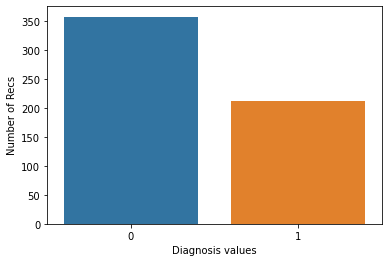

In [6]:
# lets get the frequency of cancer stages (can also use bar charts)
sns.countplot(data['diagnosis'],label="number of records")
plt.xlabel('Diagnosis values')
plt.ylabel('Number of Recs')
plt.show()

## Correlation matrix

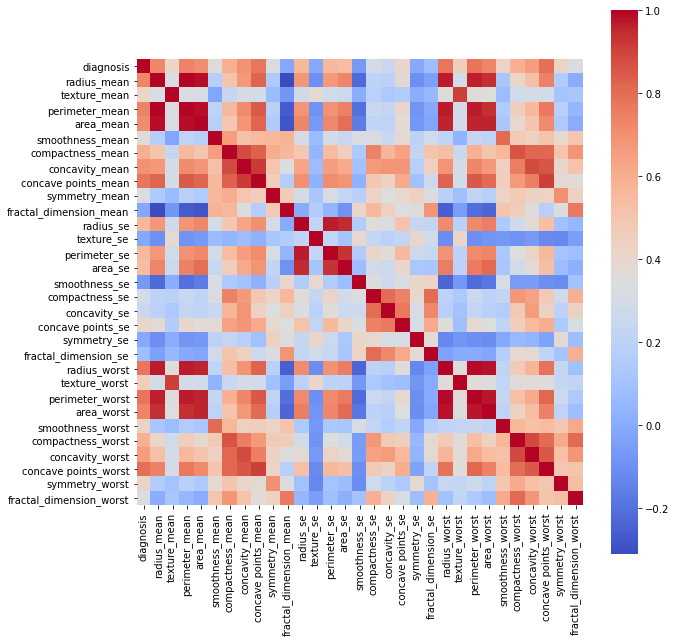

In [7]:
corr = data.corr() # .corr is used for find corelation
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True,
            cmap= 'coolwarm')
plt.show()

In [8]:
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [10]:
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000,0.730,0.415,0.743,0.709,0.359,0.597,0.696,0.777,0.330,-0.013,0.567,-0.008,0.556,0.548,-0.067,0.293,0.254,0.408,-0.007,0.078,0.776,0.457,0.783,0.734,0.421,0.591,0.660,0.794,0.416,0.324
radius_mean,0.730,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-0.312,0.679,-0.097,0.674,0.736,-0.223,0.206,0.194,0.376,-0.104,-0.043,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007
texture_mean,0.415,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-0.076,0.276,0.386,0.282,0.260,0.007,0.192,0.143,0.164,0.009,0.054,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119
perimeter_mean,0.743,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-0.261,0.692,-0.087,0.693,0.745,-0.203,0.251,0.228,0.407,-0.082,-0.006,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051
area_mean,0.709,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-0.283,0.733,-0.066,0.727,0.800,-0.167,0.213,0.208,0.372,-0.072,-0.020,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004
smoothness_mean,0.359,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,0.585,0.301,0.068,0.296,0.247,0.332,0.319,0.248,0.381,0.201,0.284,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499
compactness_mean,0.597,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,0.565,0.497,0.046,0.549,0.456,0.135,0.739,0.571,0.642,0.230,0.507,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687
concavity_mean,0.696,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,0.337,0.632,0.076,0.660,0.617,0.099,0.670,0.691,0.683,0.178,0.449,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515
concave points_mean,0.777,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,0.167,0.698,0.021,0.711,0.690,0.028,0.490,0.439,0.616,0.095,0.258,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369
symmetry_mean,0.330,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,0.480,0.303,0.128,0.314,0.224,0.187,0.422,0.343,0.393,0.449,0.332,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438


## Select Input variables from correlation matrix

In [12]:
#Based on corrplot let's select some features for the model ( decision is made in order to remove collinearity)
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
# now these are the variables which will use for prediction

## train_test_split

In [13]:
#now split our data into train and test
train, test = train_test_split(data, test_size = 0.3,random_state=1)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [14]:
train_X = train[prediction_var]# taking the training data input
train_y=train.diagnosis# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test dat

## Create an object of LogisticRegression and fit the model

In [15]:
logistic = LogisticRegression()
logistic.fit(train_X,train_y)

LogisticRegression()

## Predict

In [16]:
temp=logistic.predict(test_X)
print(metrics.accuracy_score(temp,test_y)) # to check the accuracy

0.8713450292397661


In [17]:
temp

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [18]:
#,test_y
df = pd.DataFrame({'Actual': test_y, 'Predicted': temp})  
df

,Actual,Predicted
421,0,0
47,1,0
292,0,0
186,1,1
414,1,1
...,...,...
6,1,1
487,1,1
11,1,1
268,0,0


In [19]:
#import scikitplot as skplt
#import matplotlib.pyplot as plt
    #y_true = # ground truth labels
    #y_probas = # predicted probabilities generated by sklearn classifier
#skplt.metrics.plot_roc_curve(temp,test_y)
#plt.show()

## ROC_AUC : Check for accuracy of the model

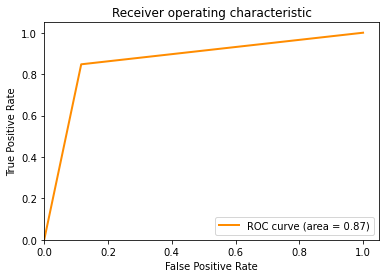

In [20]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(temp,test_y)
roc_auc = auc(fpr, tpr)
thresholds
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [37]:
roc_auc

0.8656930992736077

In [33]:
print(thresholds)
print(fpr)
print(tpr)

[2 1 0]
[0.         0.11607143 1.        ]
[0.         0.84745763 1.        ]


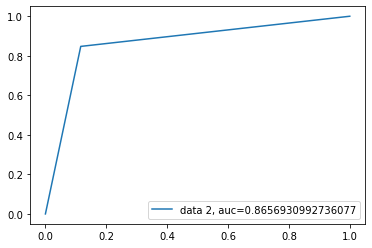

In [36]:
fpr, tpr, thresh = metrics.roc_curve(temp,test_y)
auc = metrics.roc_auc_score(temp,test_y)
plt.plot(fpr,tpr,label="data 2, auc="+str(auc))

plt.legend(loc=0)

# Decision Tree

### Default algorithm to split is 'gini'

In [202]:
clf = DecisionTreeClassifier()
clf.fit(train_X,train_y)
clf.predict(test_X)
print(clf.score(test_X,test_y))

0.8654970760233918


In [203]:
metrics.accuracy_score(test_y,clf.predict(test_X))

0.8654970760233918

### Another algorithm to split is 'entropy' : Both algorithms produce more or less the same accuracy

In [196]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(train_X,train_y)
clf.predict(test_X)
print(clf.score(test_X,test_y))

0.8596491228070176


In [197]:
metrics.accuracy_score(test_y,clf.predict(test_X))

0.8596491228070176

## Cross Validation

In [45]:
cv_score = cross_val_score(clf, train_X, train_y, cv=10)
cv_score  # 10 iterations.

array([0.9       , 0.875     , 0.875     , 0.775     , 0.925     ,
       0.925     , 0.9       , 0.975     , 0.8974359 , 0.94871795])

In [46]:
np.average(cv_score)

0.8996153846153847

### Assume our cv_score is less and our model is overfitting

### Perform Pruning

In [22]:
tree= clf.fit(train_X,train_y)
tree.tree_.__getstate__()

{'max_depth': 5,
 'node_count': 39,
 'nodes': array([( 1, 28,  1, 98.75500488, 0.46843514, 398, 398.),
        ( 2, 15,  3,  0.1249    , 0.21468868, 278, 278.),
        ( 3, 10,  1, 93.15499878, 0.10493827, 234, 234.),
        ( 4,  7,  1, 85.36499786, 0.04563717, 214, 214.),
        ( 5,  6,  2,  0.099665  , 0.01162751, 171, 171.),
        (-1, -1, -2, -2.        , 0.        , 118, 118.),
        (-1, -1, -2, -2.        , 0.03702385,  53,  53.),
        ( 8,  9,  1, 85.44999695, 0.16873986,  43,  43.),
        (-1, -1, -2, -2.        , 0.        ,   1,   1.),
        (-1, -1, -2, -2.        , 0.13265306,  42,  42.),
        (11, 12,  0, 18.36000061, 0.48      ,  20,  20.),
        (-1, -1, -2, -2.        , 0.        ,  10,  10.),
        (13, 14,  3,  0.12180001, 0.32      ,  10,  10.),
        (-1, -1, -2, -2.        , 0.19753086,   9,   9.),
        (-1, -1, -2, -2.        , 0.        ,   1,   1.),
        (16, 23,  1, 87.11499786, 0.49896694,  44,  44.),
        (17, 20,  0, 21.514

In [93]:
tree = DecisionTreeClassifier(max_depth=4)

In [94]:
tree.fit(train_X,train_y)
tree.predict(test_X)
print(tree.score(test_X,test_y))

0.8654970760233918


### Choose max_depth = 3

In [89]:
tree = DecisionTreeClassifier(max_depth=3)

In [90]:
tree.fit(train_X,train_y)
tree.predict(test_X)
print(tree.score(test_X,test_y))

0.8888888888888888


In [91]:
tree = DecisionTreeClassifier(max_depth=2)

In [92]:
tree.fit(train_X,train_y)
tree.predict(test_X)
print(tree.score(test_X,test_y))

0.847953216374269


### Printing a Decision Tree

In [178]:
os.environ['PATH']

'D:\\Anaconda;D:\\Anaconda\\Library\\mingw-w64\\bin;D:\\Anaconda\\Library\\usr\\bin;D:\\Anaconda\\Library\\bin;D:\\Anaconda\\Scripts;D:\\Anaconda\\bin;D:\\Anaconda\\condabin;D:\\Anaconda;D:\\Anaconda\\Library\\mingw-w64\\bin;D:\\Anaconda\\Library\\usr\\bin;D:\\Anaconda\\Library\\bin;D:\\Anaconda\\Scripts;D:\\RSCommon;C:\\windows\\system32;C:\\windows;C:\\windows\\System32\\Wbem;C:\\windows\\System32\\WindowsPowerShell\\v1.0;C:\\windows\\System32\\OpenSSH;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;C:\\Program Files\\NVIDIA Corporation\\NVIDIA NvDLISR;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0;C:\\WINDOWS\\System32\\OpenSSH;C:\\Users\\saqla\\AppData\\Local\\Microsoft\\WindowsApps;.;D:\\Anaconda\\Library\\bin\\graphviz'

In [172]:
#how to print a Decision tree
import os     
os.environ["PATH"] += os.pathsep + r'D:\Anaconda\Library\bin\graphviz'


In [198]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [204]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

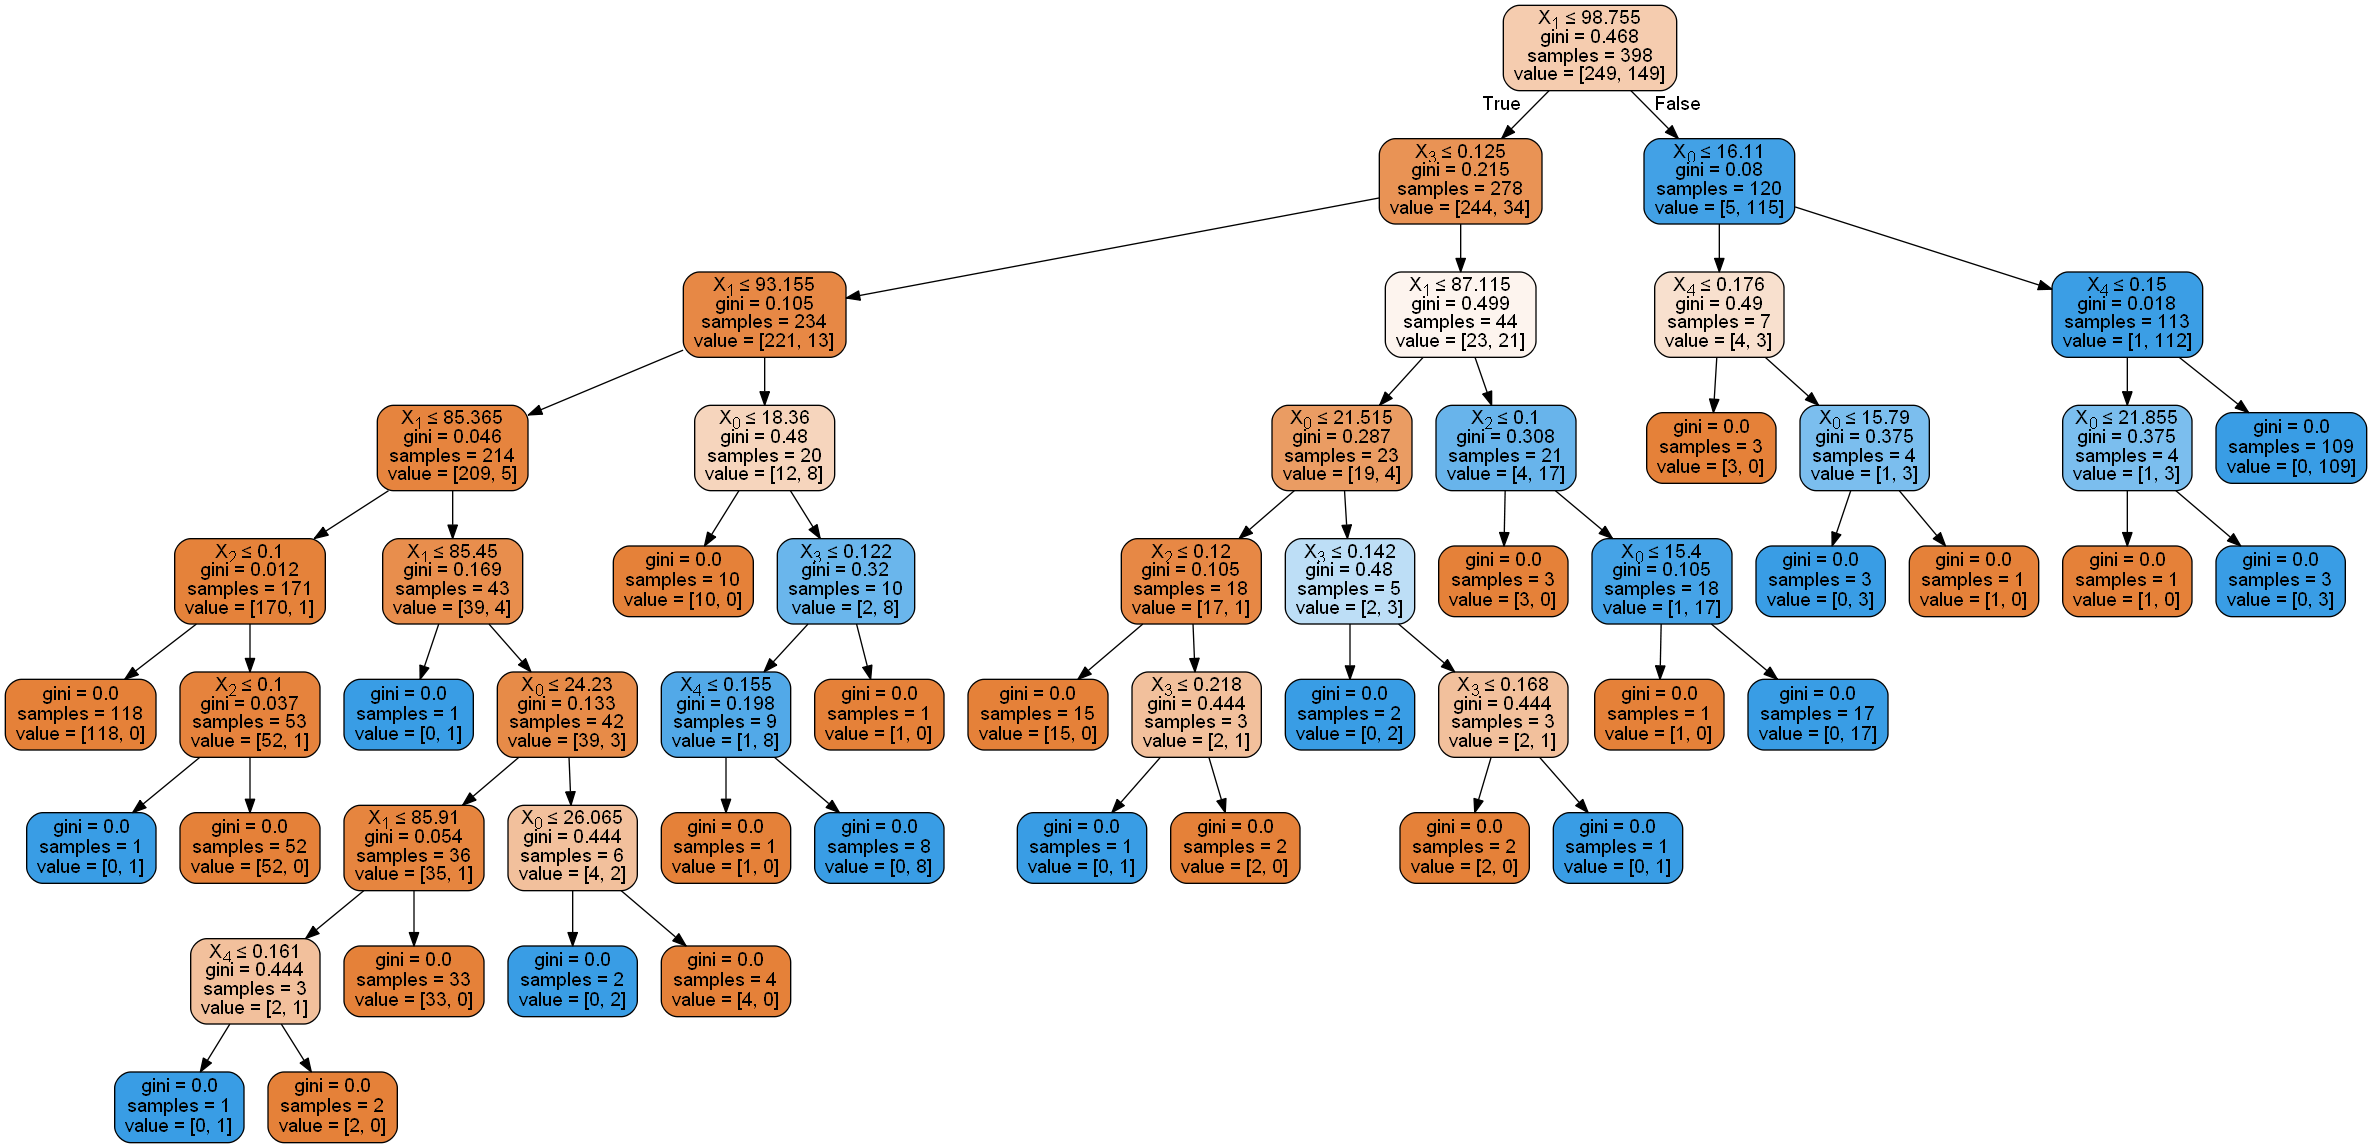

In [205]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

[Text(216.80625, 205.35999999999999, 'X[1] <= 98.755\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(145.3125, 181.2, 'X[3] <= 0.125\ngini = 0.215\nsamples = 278\nvalue = [244, 34]'),
 Text(81.375, 157.04, 'X[1] <= 93.155\ngini = 0.105\nsamples = 234\nvalue = [221, 13]'),
 Text(41.85, 132.88, 'X[1] <= 85.365\ngini = 0.046\nsamples = 214\nvalue = [209, 5]'),
 Text(18.6, 108.72, 'X[2] <= 0.1\ngini = 0.012\nsamples = 171\nvalue = [170, 1]'),
 Text(9.3, 84.56, 'gini = 0.0\nsamples = 118\nvalue = [118, 0]'),
 Text(27.900000000000002, 84.56, 'X[2] <= 0.1\ngini = 0.037\nsamples = 53\nvalue = [52, 1]'),
 Text(18.6, 60.400000000000006, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(37.2, 60.400000000000006, 'gini = 0.0\nsamples = 52\nvalue = [52, 0]'),
 Text(65.10000000000001, 108.72, 'X[1] <= 85.45\ngini = 0.169\nsamples = 43\nvalue = [39, 4]'),
 Text(55.800000000000004, 84.56, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(74.4, 84.56, 'X[0] <= 24.23\ngini = 0.133\nsamples = 4

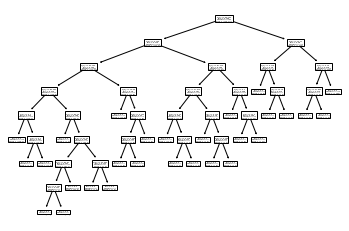

In [206]:
from sklearn.tree import plot_tree
plot_tree(clf)

## Random Forest Classifier

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
#RandomForest classifier
model=RandomForestClassifier(n_estimators=100)# a simple random forest model
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)# predict for the test data
#prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs
print(metrics.accuracy_score(prediction,test_y)) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.8888888888888888
